Carregamento dos dados de treino, teste e do desafio final

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option("display.max_rows", 120)

dados_treino = pd.read_csv(
    "/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/DADOS_TREINO.csv")
dados_teste = pd.read_csv(
    "/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/DADOS_TESTE.csv")
dados_desafioqt = pd.read_csv(
    "/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/DESAFIOQT.csv")

assert dados_treino.shape == (150000, 5)
assert dados_teste.shape == (20000, 5)
assert dados_desafioqt.shape == (10000, 5)

In [2]:
coluna_label = 'NU_NOTA_LC'
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

X_treino = dados_treino[coluna_features].to_numpy()
Y_treino = dados_treino[coluna_label].to_numpy()
X_teste = dados_teste[coluna_features].to_numpy()
Y_teste = dados_teste[coluna_label].to_numpy()

Plotando os dados de treino e teste verificando conscistência.

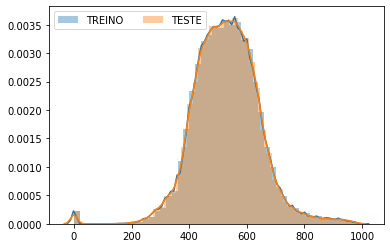

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 

x0 = dados_treino
x1 = dados_teste
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TREINO','TESTE'], ncol=2, loc='upper left')

Os dados já vieram bem tratados, como foi feito em testes em outros notebooks que me trouxeram a este final. Sabendo não existir dados faltantes entre as colunas. Optei por utilizar o StandartScaler centralizando os dados levando em consideração a média.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True, with_mean=True, with_std=False)
X_treino = sc.fit_transform(X_treino)  
X_teste = sc.transform(X_teste)

Entre diversos regressors optei pelo GradientBoostingRegressor pela simplicidade e velocidade com a qual me retornou os melhores resultados. Aqui a falta de experiência torna-se evidente, pois na configuração dos parâmetros foi tensa. E acredito que poderia ainda ter sido melhor. 

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

modelo_gbr = GradientBoostingRegressor(
    alpha=0.5,
    n_estimators=200,
    learning_rate=0.2335589533,
    max_depth=2,
    random_state=0,
    loss='ls',
)

In [6]:
modelo_gbr.fit(X_treino, Y_treino)

GradientBoostingRegressor(alpha=0.5, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2335589533, loss='ls',
                          max_depth=2, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
y_pred_treino = modelo_gbr.predict(X_treino)
y_pred_teste = modelo_gbr.predict(X_teste)

Utilizando o cross_val_score para realizar a validação cruzada do modelo. E também testando a métrica mean_squared_error (erro quadrático médio) que é o critério de avaliação desse desafio.

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

print(cross_val_score(modelo_gbr, X_treino, Y_treino, cv = 5))
print(cross_val_score(modelo_gbr, X_teste, Y_teste, cv = 5))
print(mean_squared_error(Y_treino, y_pred_treino))
print(mean_squared_error(Y_teste, y_pred_teste))

[0.61642921 0.61102973 0.6110867  0.61732479 0.61232997]
[0.59511015 0.58990606 0.58833057 0.5961965  0.60204164]
1994.8517687861336
2043.5592670768394


Submissão do modelo

In [9]:
MODELO = modelo_gbr
X_desafioqt = dados_desafioqt[coluna_features].to_numpy()
predicao_desafioqt = MODELO.predict(X_desafioqt)


desafio_df = pd.DataFrame(dados_desafioqt.ID)
desafio_df[coluna_label] = predicao_desafioqt

#NÃO TROCAR O NOME DO ARQUIVO DE SAÍDA (PREDICAO_DESAFIO)
desafio_df.to_csv('PREDICAO_DESAFIOQT.csv', index=False) 
#files.download('PREDICAO_DESAFIOQT.csv')



In [7]:
modelo_gbr.score(X)

<bound method RegressorMixin.score of GradientBoostingRegressor(alpha=0.5, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2335589533, loss='ls',
                          max_depth=2, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>